<h2>Bibliotheques utilisées :</h2>
<ul>
    <li>geopy</li>
    <li>pandas</li>
    <li>numpy</li>
    <li>matplotlib</li>
    <li>sklearn</li>
    <li>datetime</li>
    
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import geopy.distance
from datetime import datetime
from dateutil.parser import isoparse

<p> <strong>Note : </strong> Les fichiers de donnée sont à être ajouté dans le dossier référencé par "path" dans le code ci-dessous </p>

In [2]:
#Importation des données
path = "data/"

ticket_frame = pd.read_csv(path + "ticket_data.csv", index_col='id')
stations_frame = pd.read_csv(path + "stations.csv", index_col='id')
providers_frame = pd.read_csv(path + "providers.csv", index_col='id')
cities_frame = pd.read_csv(path + "cities.csv", index_col='id')

<hr/>
<h1>Vue générale sur la table "ticket" </h1>

On commencera tout d'abord par afficher quelques informations générale sur la table en question:

In [93]:
print("Prix moyen d'un ticket en centime : {:.0f} soit {:.2f} euros".format(ticket_frame['price_in_cents'].mean(), ticket_frame['price_in_cents'].mean()/100))
print("Prix minimal d'un ticket en centime : {:.0f} soit {:.2f} euros".format(ticket_frame['price_in_cents'].min(), ticket_frame['price_in_cents'].min()/100))
print("Prix maximal d'un ticket en centime : {:.0f} soit {:.2f} euros".format(ticket_frame['price_in_cents'].max(), ticket_frame['price_in_cents'].max()/100))

print("\nDescription générale de la table:")
ticket_frame['price_in_cents'].describe()

Prix moyen d'un ticket en centime : 4383 soit 43.83 euros
Prix minimal d'un ticket en centime : 300 soit 3.00 euros
Prix maximal d'un ticket en centime : 38550 soit 385.50 euros

Description générale de la table:


count    74168.000000
mean      4382.711061
std       3739.325367
min        300.000000
25%       1900.000000
50%       3350.000000
75%       5250.000000
max      38550.000000
Name: price_in_cents, dtype: float64

In [8]:
ticket_frame

,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
id,,,,,,,,,,,
6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542
...,...,...,...,...,...,...,...,...,...,...,...
6869182,13,279.0,10729.0,2017-10-27 02:30:00+00,2017-10-27 16:00:00+00,2590,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562
6869185,9,279.0,304.0,2017-10-27 07:00:00+00,2017-10-27 13:30:00+00,2700,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562
6869187,8371,10642.0,304.0,2017-10-27 08:30:00+00,2017-10-27 15:15:00+00,3000,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562


<h2>Informations sur les durées des trajets </h2>
<p>
    Maintenant que nous avons une vue globale de la table avec laquelle nous travaillons, nous allons nous interesser sur 
    les differentes durées que peuvent avoir les trajets.
</p>
<p>
    Nous allons tout d'abord décrire les durées :
</p>

In [57]:
duree_serie = ticket_frame['arrival_ts'].apply(isoparse) - ticket_frame['departure_ts'].apply(isoparse)
print("Durée maximale d'un trajet : \t {} ".format(duree_serie.max()))
print("Durée moyenne d'un trajet : \t {} ".format(duree_serie.mean()))
print("Durée minimale d'un trajet : \t {} ".format(duree_serie.min()))

Durée maximale d'un trajet : 	 20 days 12:51:00 
Durée moyenne d'un trajet : 	 0 days 07:04:37.247600043 
Durée minimale d'un trajet : 	 0 days 00:20:00 


<br>
<p> 
    Ici nous allons tracer le graphe du prix par rapport à la longueur du trajet. On remarquera à première vue la présence
    de valeurs abérente (durée du trajet à plus de 20 jours). <br>
    Ces valeurs pourraient être expliquées par de nombreuses manières, mais elles restent tout de même bizarres compte tenu du contexte
</p>

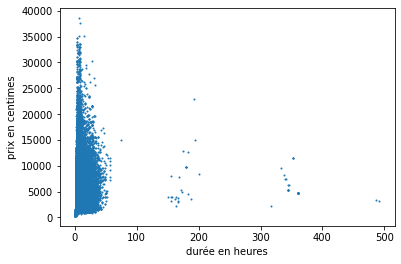

In [139]:
#Correlation prix-longueur
duree_en_heures = duree_serie.apply(lambda x: x.seconds//3600 + x.days*24)
plt.scatter(duree_en_heures, ticket_frame['price_in_cents'], s=1)
plt.xlabel("durée en heures")
plt.ylabel("prix en centimes")
plt.show()

<br>
<p>
    Pour ne plus faire attention à ces valeurs, on ne se concentera uniqument que sur les durées d'au moins 48 heures :
</p>

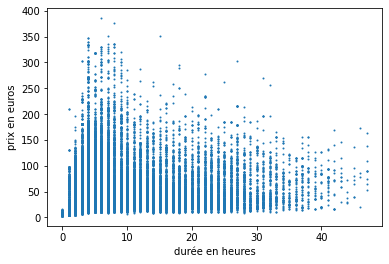

In [142]:
plt.scatter(duree_en_heures[duree_en_heures< 2*24], ticket_frame['price_in_cents'][duree_en_heures< 2*24]/100, s=1)
plt.xlabel("durée en heures")
plt.ylabel("prix en euros")
plt.show()

<p>
    Pour ce qui est des valeurs plus grande que 20 jours, voici un des ticket portant cette valeur. Après avoir fait 
    l'analyse des distances, on se rendera compte que la distance de ce trajet est d'un peu plus que 700 km<br>
    Cela pourrait s'expliquer par un voyage en escale dont la deuxieme partie du voyage commence bien après le depart.
    
    Voici alors les valeurs de l'entrée : 
</p>

In [143]:
jours = duree_serie.apply(lambda x: x.days)
jours[jours >= 20].head()
ticket_frame.loc[6800200]

company                                 8372
o_station                              860.0
d_station                              396.0
departure_ts          2017-10-27 23:59:00+00
arrival_ts            2017-11-17 12:50:00+00
price_in_cents                          3200
search_ts          2017-10-02 20:39:10.75+00
middle_stations                {10760,10144}
other_companies                          {9}
o_city                                   126
d_city                                   453
distance                          703.909174
type_transport                           bus
Name: 6800200, dtype: object

<h2> L'intervale de temps entre la recherche d'un trajet et le départ de celui-ci </h2>

<p> 
    On voit ici que la majorité des utilisateurs recherche leurs billets 15 jours à l'avance du départ potentiel. Et la quasi 
    totalité de ceci recherche leurs billets dans les 30 jours précédant le départ.
    <br>
    Certains se retrouvent aussi à chercher des billets pour des trajets ayant déja commencé.
</p>

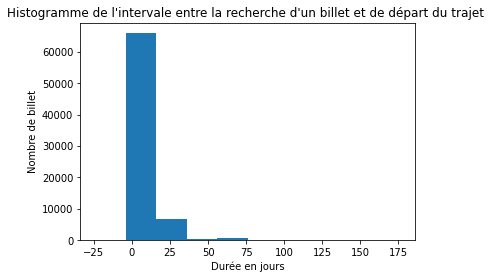

In [130]:
duree_serie_v_d = ticket_frame['departure_ts'].apply(isoparse) - ticket_frame['search_ts'].apply(isoparse)
delta_search_depart = duree_serie_v_d.apply(lambda x: x.days)
plt.hist(delta_search_depart)

plt.xlabel("Durée en jours")
plt.ylabel("Nombre de billet")
plt.title("Histogramme de l'intervale entre la recherche d'un billet et de départ du trajet ")
plt.show()

<hr>
<h1>Difference de prix moyen selon la distance/ type de transport</h1>

<p> 
    Notre but ici est de determiner tout d'abord la distance entre chaque stations/villes de notre DataFrame.
    On utilisera ici les données sur la positions des villes lors de l'abscence de données sur la positions des stations
</p>

In [148]:
def my_eval(str):
    return [ int(val) for val in str[1:-1].split(',')]


#Retourne la distance à parcours lors d'un trajet
def get_travel_distance(ticket_row):
    
    #Cette fonction retourne une distance à partir d'une liste de coordonnées
    def get_distance_from_coord(coord_list):
        distance_total = 0.0
        last_cooords = coord_list.pop(0)

        for coord in coord_list:
            distance_total += geopy.distance.geodesic(coord, last_cooords).km
            last_cooords = coord
            
        return distance_total
    
    #Si aucune stations n'a été spécifié, on travaillera avec les distances entres les villes
    if pd.isna(ticket_row['o_station']):
        o_city_id = ticket_row['o_city']
        d_city_id = ticket_row['d_city']
        
        o_city = cities_frame.loc[o_city_id]
        d_city = cities_frame.loc[d_city_id]
        
        o_coord = ( o_city['latitude'], o_city['longitude'] )
        d_coord = ( d_city['latitude'], d_city['longitude'] )
        
        return get_distance_from_coord( [d_coord, o_coord] ) 
    
    #Si aucune stations n'a été spécifié, on calculera les distances entres les stations
    else:
        middle_stations = ticket_row['middle_stations']
        o_station_id = ticket_row['o_station']
        d_station_id = ticket_row['d_station']
        
        o_station = stations_frame.loc[o_station_id]
        d_station = stations_frame.loc[d_station_id]  
        
        #On ajoute la station d'origine à la liste
        stations_list = [ ( o_station['latitude'], o_station['longitude'] ) ]
    
        #Si le voyage comporte des "middle_stations", on les ajoute aussi à la liste
        if not pd.isna(middle_stations):
            middle_stations_ids = my_eval(middle_stations) #Here the values is stored as a string, so we have to convert it

            for middle_station_id in middle_stations_ids:
                middle_station = stations_frame.loc[middle_station_id]
                stations_list.append( (middle_station['latitude'], middle_station['longitude']) )
        
        #On ajoute la destination à la liste
        stations_list.append( ( d_station['latitude'], d_station['longitude'] ) )

        #Maintenant on peut calculer la distance
        return get_distance_from_coord( stations_list ) 
            
    
  
ticket_frame['distance'] = ticket_frame.apply(get_travel_distance, axis=1)


<br>
<p> On affiche alors le histogramme des valeurs des distances </p>

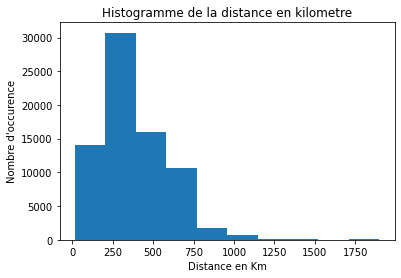

In [194]:
plt.hist(ticket_frame['distance'])
plt.xlabel('Distance en Km')
plt.ylabel("Nombre d'occurence")
plt.title("Histogramme de la distance en kilometre")
plt.show()

<br>
<p> Maintenant on peut refaire la même manipulation sur 0-200km, 200km-800km, 800km-2000km </p>

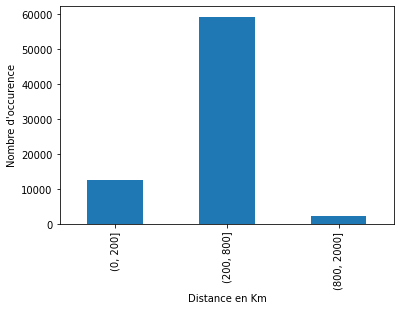

In [196]:
intervals = pd.Series([0, 200, 800, 2000])
freq['distance'] = pd.cut(ticket_frame['distance'], intervals)
freq.groupby(['distance']).size().plot.bar()
plt.xlabel('Distance en Km')
plt.ylabel("Nombre d'occurence")
plt.show()

<p>
    On voit ainsi que la majorité des trajets sont sur <strong>[200km 800km]</strong>
</p>

<h1>Analyse du prix en fonction de la distance et du type de transport</h1>
Donc ici on se permettera d'analyser tout d'abord le prix d'un trajet en fonction de la distance. Nous passerons par la suite à l'analyse de ce même prix en fonction des trois types de transports proposés

<h2> Prix du trajet en fonction de la distance indépendament du type de transport</h2>

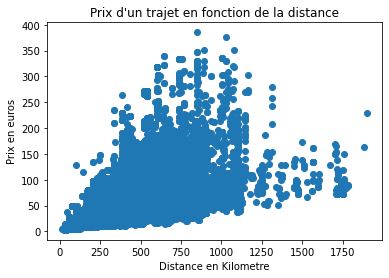

In [66]:
plt.scatter(ticket_frame['distance'], ticket_frame['price_in_cents']/100)

#Labeling
plt.xlabel("Distance en Kilometre")
plt.ylabel("Prix en euros")
plt.title("Prix d'un trajet en fonction de la distance")
plt.show()

<br>
<p>
    Comme on peut le voir, il y a une sorte de corrélation entre ces valeurs <br>
    On peut alors définir <strong> un modèle </strong> de régression linaire avec sklearn de tel que :
</p>

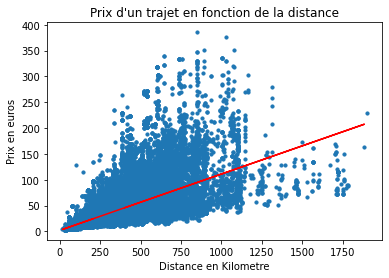

In [68]:
#On génère un modèle approximant nos données
#==========================================================
regressor = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(ticket_frame['distance'].values, ticket_frame['price_in_cents'].values, test_size=0.2, random_state=0)

x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

regressor.fit(x_train, y_train)
ytest = regressor.predict(x_test)

#On affiche la fonction de notre modèle supperposée sur nos données
#==========================================================

plt.plot(x_test, ytest/100, c='red')
plt.scatter(ticket_frame['distance'], ticket_frame['price_in_cents']/100, s=10)

#Labeling
plt.xlabel("Distance en Kilometre")
plt.ylabel("Prix en euros")
plt.title("Prix d'un trajet en fonction de la distance")
plt.show()

<p> 
    On a bien un résultat plutot convincant, mais on peut fair beaucoup mieux,
    Il suffit de diviser nos donner en 3 category, une pour chaque <strong> type de transport</strong>.
    <br>
    C'est ce que nous fairons lors de la prochaine partie.
</p>

<h2> Prix du trajet en fonction de la distance et du type de transport</h2>

In [70]:
#On regroupe les trajets par type transports
#================================================================
def get_type_transport(row):
    id_provider = row['company']
    transport_type = providers_frame.loc[id_provider]['transport_type']
    return transport_type
ticket_frame['type_transport'] = pd.Categorical(ticket_frame.apply(get_type_transport, axis=1))

#On affiche le nombre d'occurence de chaque type de transport
ticket_frame.groupby(['type_transport']).size()

type_transport
bus           13798
carpooling    41441
train         18929
dtype: int64

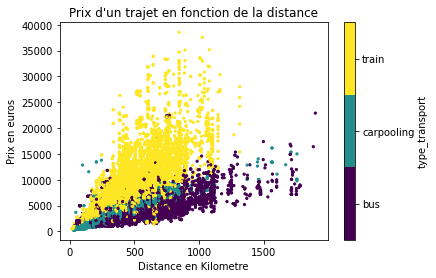

In [71]:
#On colorie les points du graphe précédant en fonction du type de transport
ticket_frame.plot.scatter(x="distance", y="price_in_cents", c="type_transport", colormap="viridis",s=5, sharex=False)

#Labeling
plt.xlabel("Distance en Kilometre")
plt.ylabel("Prix en centimes d'euros")
plt.title("Prix d'un trajet en fonction de la distance")
plt.show()

<p> On voit bien l'impacte de la classe sur le prix, on peut ainsi mettre à jour notre modèle pour augmenter sa precision </p> <br>

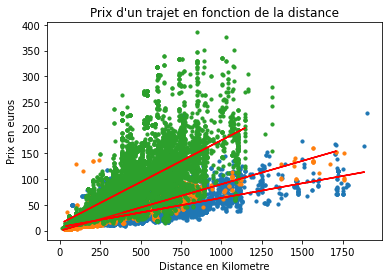

In [74]:
#Entrainement du modele pour chaque categorie
#===========================================================================================
models = {}
x_test = {}
for category_name, category_frame in ticket_frame.groupby(['type_transport']):
    
    models[category_name] = LinearRegression()
    x_train, x_test[category_name], y_train, y_test = train_test_split(category_frame['distance'].values, category_frame['price_in_cents'].values, test_size=0.2, random_state=0)

    x_train= x_train.reshape(-1, 1)
    y_train= y_train.reshape(-1, 1)
    x_test[category_name] = x_test[category_name].reshape(-1, 1)

    models[category_name].fit(x_train, y_train)
    y_res = models[category_name].predict(x_test[category_name])
    
    plt.plot(x_test[category_name], y_res/100, c="red")
    plt.scatter(category_frame['distance'], category_frame['price_in_cents']/100, s=10)
    
    
    #Labeling
    plt.xlabel("Distance en Kilometre")
    plt.ylabel("Prix en euros")
    plt.title("Prix d'un trajet en fonction de la distance")


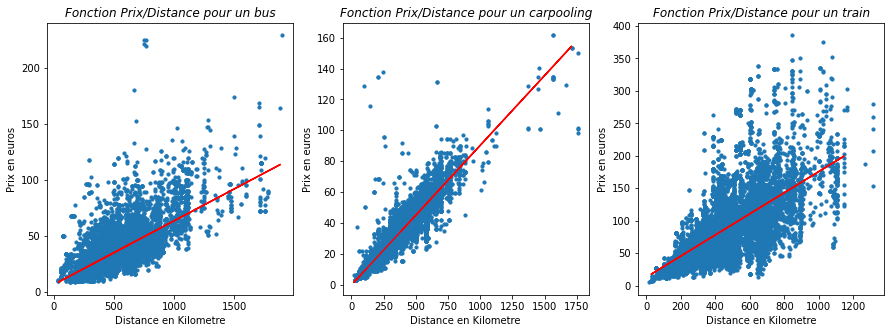

In [84]:
i = 1
fig = plt.figure(figsize=(15, 5))
for category_name, category_frame in ticket_frame.groupby(['type_transport']):
    
    ytest = models[category_name].predict(x_test[category_name])
    

    ax = fig.add_subplot(1, 3, i)   
    ax.plot(x_test[category_name], ytest/100, c="red")
    ax.scatter(category_frame['distance'], category_frame['price_in_cents']/100, s=10)
    i+=1
    
    #Labeling
    ax.set_title("Fonction Prix/Distance pour un " + category_name, fontstyle='italic')
    ax.set_xlabel("Distance en Kilometre")
    ax.set_ylabel("Prix en euros")
    


<p>
    Les résultats ici sont convincant, notament pour le carpooling qui suit quasiment parfaitement la droite définit.
    <br>
    On peut maintenant utiliser ce modèle pour faire des <strong>prédictions</strong>.
</p>

<h2>Prédiction du prix d'un ticket</h2>

<p>
    Executez la partie ci-dessous puis entrez les valeurs requises, le modèle se chargera de calculer le prix et d'afficher un 
    resultat sur le graphe ci-dessous.
</p>

Entrez une distance en km (exemple: 500) : 500
Entrez le type de transport [train, bus, carpooling] : train


Le prix prédit est de : 94.36 euros soit 9436 centimes


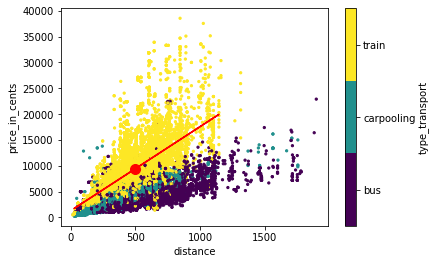

In [ ]:
#Prédictions des prix
distance = int( input( "Entrez une distance en km (exemple: 500) :" ) )
type_transport = input( "Entrez le type de transport [train, bus, carpooling] :" )

x = np.array([distance]).reshape(-1, 1)
predicted_price = models[type_transport].predict(x)
print("Le prix prédit est de : {:.2f} euros soit {:.0f} centimes".format(predicted_price[0][0]/100, predicted_price[0][0]))


ticket_frame.plot.scatter(x="distance", y="price_in_cents", c="type_transport", colormap="viridis",s=5, sharex=False);
plt.plot(distance,predicted_price[0][0], marker="o", color="red", markersize=10)

#On dessine la droite pour référence
ytest = models[type_transport].predict(x_test[type_transport])
plt.plot(x_test[type_transport], ytest, c="red")

<hr>
<h1>Les pays et les villes les plus recherchés</h1>

<blockquote>D'abord il serait interessant de passer en revenue les destinations les plus prisées par les utilisateurs</blockquote>


In [77]:
def extract_country(local_name):
    return local_name.split(',')[2][1:]

def get_most_visited_country(france_included=True):
    d_cities_count = ticket_frame['d_city'].value_counts()
    o_cities_count = ticket_frame['o_city'].value_counts()
    
    result = pd.concat([cities_frame['local_name'], o_cities_count, d_cities_count] , join='inner', axis=1)
    result['local_name'] = result['local_name'].apply(extract_country)

    result = result.groupby(['local_name']).sum()
    
    if not france_included:
        result.drop(['France'], inplace=True)

    return result

def get_most_visited_city():
    d_cities_count = ticket_frame['d_city'].value_counts()
    o_cities_count = ticket_frame['o_city'].value_counts()
    
    result = pd.concat([cities_frame['unique_name'], o_cities_count, d_cities_count] , join='inner', axis=1)

    return result


<br>
<p>
    On affichera les valeurs calculées.
    <br>
    Comme on aurait pu s'attendre, les villes les plus prisées sont toute en France.
    Vu que le site <strong>tictactrip</strong> est avant tout visité par des francais, cela semble logique.
</p>

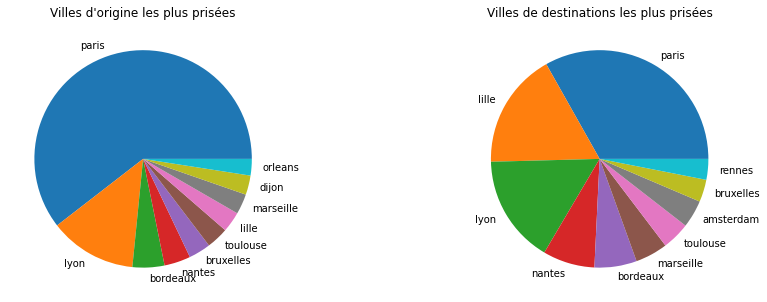

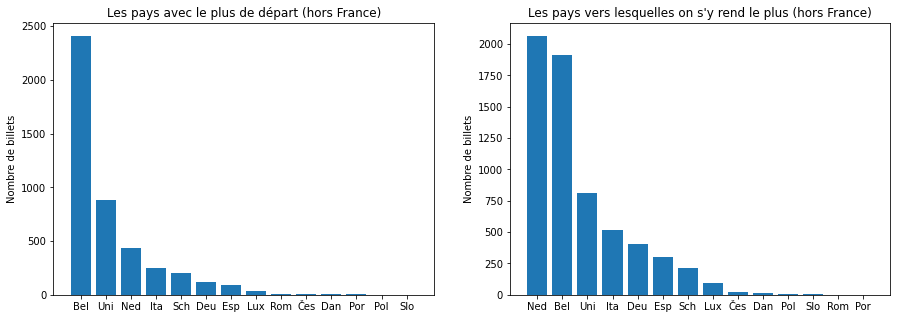

In [221]:
frequency_city_frame = get_most_visited_city()
frequency_country_frame = get_most_visited_country(False)

o_frequency_city_frame = frequency_city_frame.sort_values(by="o_city", ascending=False).iloc[:10]
d_frequency_city_frame = frequency_city_frame.sort_values(by="d_city", ascending=False).iloc[:10]
o_frequency_country_frame = frequency_country_frame.sort_values(by="o_city", ascending=False).iloc[:20]
d_frequency_country_frame = frequency_country_frame.sort_values(by="d_city", ascending=False).iloc[:20]

#Plot
#================================================================
#Les camemberts
fig_pie = plt.figure(figsize=(15, 5))

ax = fig_pie.add_subplot(1, 2, 1)   
ax.pie(o_frequency_city_frame['o_city'], labels=o_frequency_city_frame['unique_name'])
ax.set_title("Villes d'origine les plus prisées")

ax = fig_pie.add_subplot(1, 2, 2)   
ax.pie(d_frequency_city_frame['d_city'], labels=d_frequency_city_frame['unique_name'])
ax.set_title("Villes de destinations les plus prisées")

#Les batons
fig_bar = plt.figure(figsize=(15, 5))

ax = fig_bar.add_subplot(1, 2, 1)   
plt.bar(list(map(lambda x: x[0:3], o_frequency_country_frame.index.values)), o_frequency_country_frame['o_city'] )
ax.set_title("Les pays avec le plus de départ (hors France)")
ax.set_ylabel("Nombre de billets")

ax = fig_bar.add_subplot(1, 2, 2)   
plt.bar(list(map(lambda x: x[0:3], d_frequency_country_frame.index.values)), d_frequency_country_frame['d_city'] )
ax.set_title("Les pays vers lesquelles on s'y rend le plus (hors France)")
ax.set_ylabel("Nombre de billets")

plt.show()

<h2> Prix d'un ticket en fonction du pays </h2>
<p> 
    Ici on essaira de determiner quel est le pays le plus cher à s'y rendre. On effectuera cela de deux manière.<br>
    La première étant la méthode naif où on compte directement le prix moyen pour aller vers le pays.
    La seconde se fait en comptant la distance séparant les deux pays, pour avoir <strong>un prix au kilometre</strong>
</p>

In [86]:
def get_country_from_id(id_city):
    local_name = cities_frame.loc[id_city]['local_name']
    return extract_country(local_name)

def compute_category(row):
    if row['d_pays'] == "France" and row['o_pays'] == "France":
        return "local"
    else:
        return "international"

ticket_countries_frame = pd.DataFrame({'d_pays':[], 'o_pays':[], 'category':[]})

ticket_countries_frame['d_pays'] = ticket_frame["d_city"].apply(lambda row: get_country_from_id(row))
ticket_countries_frame['o_pays'] = ticket_frame["o_city"].apply(lambda row: get_country_from_id(row))
ticket_countries_frame['category'] = pd.concat([ticket_countries_frame['d_pays'], ticket_countries_frame['o_pays']], join='inner', axis=1).apply(compute_category, axis=1)
ticket_countries_frame['distance'] = ticket_frame["distance"]
ticket_countries_frame['price_in_cents'] = ticket_frame["price_in_cents"]

<p> On peut maintenant afficher les résulats :</p>

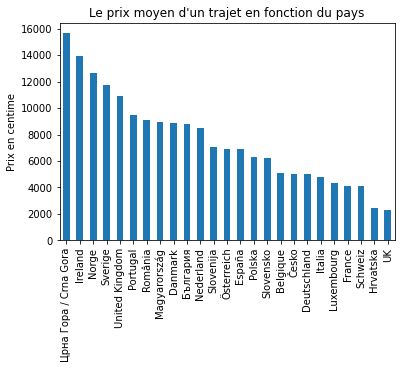

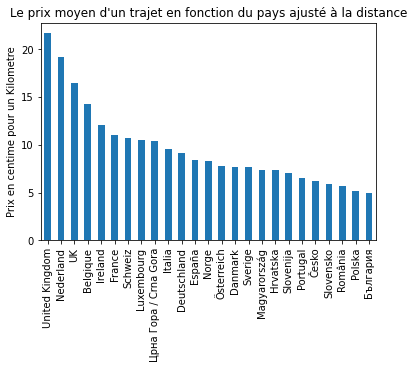

In [241]:
#==========================================
#Comparaison des prix par pays
#==========================================
ticket_countries_group = ticket_countries_frame.groupby(['d_pays']).mean()
ticket_countries_group['price_per_km'] = ticket_countries_group.apply(lambda x: x['price_in_cents']/x['distance'], axis=1)

#Les pays les plus cher
ax = ticket_countries_group['price_in_cents'].sort_values(ascending=False).plot.bar()
ax.set_title("Le prix moyen d'un trajet en fonction du pays")
ax.set_ylabel("Prix en centime")
ax.set_xlabel("")

#Les pays les plus cher ajuster à la distance
plt.figure()
ax = ticket_countries_group['price_per_km'].sort_values(ascending=False).plot.bar()
ax.set_title("Le prix moyen d'un trajet en fonction du pays ajusté à la distance")
ax.set_ylabel("Prix en centime pour un Kilometre")
ax.set_xlabel("")
plt.show()

<p> Comme on peut le voir, les résultats sont differents du tout au tout </p>
<p> 
Un autre point à remarquer concerne les données fournit, on voit ici que le royaume unit est appelé deux fois l'une sous forme
de "United Kingdom" et l'autre sous forme de "UK", cela esdt problématique car il faudra corriger ces valeurs obtenues. Donc mieux
vaux faire cela directement sur le DataFrame avant de le charger, et ainsi le corriger.
</p>

<strong> Local-International: </strong> <br>
<p> Ici on compare les valeurs des prix locaux vs internationaux </p>
<p> On procédera ici aussi à la prise en compte de la distance du trajet pour avoir un prix au kilometre</p>

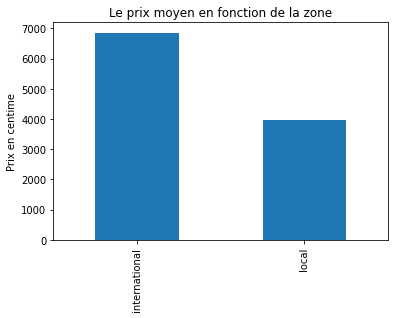

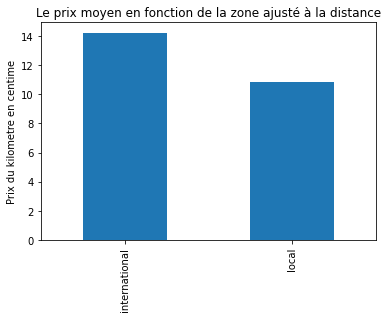

In [242]:
#==========================================
#Comparaison des prix locaux-internationaux
#==========================================
ticket_countries_group = ticket_countries_frame.groupby(['category']).mean()
ticket_countries_group['price_per_km'] = ticket_countries_group.apply(lambda x: x['price_in_cents']/x['distance'], axis=1)

#Les pays les plus cher
ax = ticket_countries_group['price_in_cents'].sort_values(ascending=False).plot.bar()
ax.set_title("Le prix moyen en fonction de la zone")
ax.set_ylabel("Prix en centime")
ax.set_xlabel("")

#Les pays les plus cher ajuster à la distance
plt.figure()
ax = ticket_countries_group['price_per_km'].sort_values(ascending=False).plot.bar()
ax.set_title("Le prix moyen en fonction de la zone ajusté à la distance")
ax.set_ylabel("Prix du kilometre en centime")
ax.set_xlabel("")

plt.show()

### 

In [60]:
providers_frame

,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
id,,,,,,,,,
9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
11,3,NaN,infobus,Infobus,False,False,False,False,bus
12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
13,5,NaN,flixbus,Flixbus,True,False,False,False,bus
...,...,...,...,...,...,...,...,...,...
8384,10,16,thalys,Thalys,True,True,False,True,train
8385,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
8387,30,NaN,vatry,Vatry,NaN,NaN,NaN,NaN,bus


In [59]:
providers_frame.loc[13]

company_id                    5
provider_id                 NaN
name                    flixbus
fullname                Flixbus
has_wifi                   True
has_plug                  False
has_adjustable_seats      False
has_bicycle               False
transport_type              bus
Name: 13, dtype: object